In [1]:
import numpy as np
import pandas as pd
import scipy
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns

# For Regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostRegressor

from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split

In [2]:
# For Classification
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

In [3]:
# Randomoversampler
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Import cleaned data set
credit = pd.read_csv('Credit_One_Data_for_Task3.csv')

In [6]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29965 entries, 0 to 29964
Data columns (total 32 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Credit Limit                    29965 non-null  int64  
 1   Sex                             29965 non-null  int64  
 2   Highest Education: High School  29965 non-null  int64  
 3   Highest Education: University   29965 non-null  int64  
 4   Highest Education: Grad School  29965 non-null  int64  
 5   Highest Education: Other        29965 non-null  int64  
 6   Marital Status                  29965 non-null  int64  
 7   Age                             29965 non-null  int64  
 8   Dlq Sep                         29965 non-null  int64  
 9   Dlq Aug                         29965 non-null  int64  
 10  Dlq Jul                         29965 non-null  int64  
 11  Dlq Jun                         29965 non-null  int64  
 12  Dlq May                         

## Cross Validation Function

In [7]:
# Create cross validation function for regression algorithms
def cv_regr(X, y):
    algos_Class = []
    algos_Class.append(('RFR',RandomForestRegressor()))
    algos_Class.append(('LinR', LinearRegression()))
    algos_Class.append(('LogR', LogisticRegression()))
    algos_Class.append(('SVR', SVR()))
    algos_Class.append(('ABR', AdaBoostRegressor()))
    results = []
    names = []
    for name, model in algos_Class:
        result = cross_val_score(model, X, y, cv=3, scoring='r2')
        names.append(name)
        results.append(result)
        print(name, result.mean())

## Set Features and Target

In [8]:
# Features
# Sex, Education dummies, Marital, Age, Avg Dlq, Avg Bill, Avg Payment, Default
X = credit.iloc[:,[1,2,3,4,5,6,7,29,30,31,26]]
print('Summary of feature sample')
X.head()

Summary of feature sample


,Sex,Highest Education: High School,Highest Education: University,Highest Education: Grad School,Highest Education: Other,Marital Status,Age,Avg Dlq Status,Avg Monthly Bill,Avg Monthly Payment,Default?
0,0,0,1,0,0,1,24,0.666667,1284.000000,114.833333,1
1,0,0,1,0,0,0,26,0.666667,2846.166667,833.333333,1
2,0,0,1,0,0,0,34,0.000000,16942.166667,1836.333333,0
3,0,0,1,0,0,1,37,0.000000,38555.666667,1398.000000,0
4,1,0,1,0,0,1,57,0.000000,18223.166667,9841.500000,0


In [9]:
# Dependent Variable
y = credit['Credit Limit']

In [10]:
cv_regr(X, y)

RFR 0.42463889553227796
LinR 0.2762463146293211
LogR -2.1352108453035292
SVR -0.050541784548267854
ABR 0.1713759045322468


In [11]:
# Features = Sex, Education dummies, Marital, Age, All Dlq, All Bill, All Payment, Default
# Target = Credit Limit
X = credit.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]]
y = credit['Credit Limit']
cv_regr(X, y)

RFR 0.4643824193789321
LinR 0.28188269086940687
LogR -2.0703222809261326
SVR -0.0503232564324303
ABR -0.07241990513464891


In [12]:
# Features = Education dummies, Marital, Age, All Dlq, All Payment, Default
# Target = Credit Limit
X = credit.iloc[:,[2,3,4,5,6,7,8,9,10,11,12,13,20,21,22,23,24,25,26]]
y = credit['Credit Limit']
cv_regr(X, y)

RFR 0.40527527169333016
LinR 0.23584843735839636
LogR -4.900953820319413
SVR -0.05198501332660266
ABR 0.0037553077902692986


In [13]:
# Features = All Dlq, All Bill, All Payment, Default
# Target = Credit Limit
X = credit.iloc[:,[8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]]
y = credit['Credit Limit']
cv_regr(X, y)

RFR 0.41066763873043405
LinR 0.20111591088117156
LogR -2.035982898042468
SVR -0.05025214717012109
ABR -0.14538154166104475


In [14]:
# Features = Sex, Education dummies, Marital, Age, Sep & Apr Dlq, Bill, & Payment, Default
# Target = Credit Limit
X = credit.iloc[:,[1,2,3,4,5,6,7,8,13,14,19,20,25,26]]
y = credit['Credit Limit']
cv_regr(X, y)

RFR 0.43469933880106476
LinR 0.26074590567836436
LogR -1.7689290311156476
SVR -0.05025938378921838
ABR 0.05282759718842215


In [15]:
# Features = Sex, Education dummies, Marital, Age, All Dlq, Avg Bill, Avg Payment, Default
# Target = Credit Limit
X = credit.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,30,31,26]]
y = credit['Credit Limit']
cv_regr(X, y)

RFR 0.4221125447140122
LinR 0.27679643076699995
LogR -2.0571412980312034
SVR -0.050566834582601285
ABR 0.07817721560941641


In [16]:
# Features = Sex, Education dummies, Marital, Age, All Dlq, Avg Payment, Default
# Target = Credit Limit
X = credit.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,31,26]]
y = credit['Credit Limit']
cv_regr(X, y)

RFR 0.28968815878929505
LinR 0.2319892522059439
LogR -0.8913518398073546
SVR -0.048511197887167144
ABR 0.09017107681459424


In [17]:
# Features = Sex, Education dummies, Marital, Age, All Dlq, All Payment, Default
# Target = Credit Limit
X = credit.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,20,21,22,23,24,25,26]]
y = credit['Credit Limit']
cv_regr(X, y)

RFR 0.4087110904553066
LinR 0.23681722392213592
LogR -4.750874179048563
SVR -0.05198780563903416
ABR 0.10006018029940651


In [18]:
# Features = Avg Dlq, Avg Bill, Avg Payment, Default
# Target = Credit Limit
X = credit.iloc[:,[29,30,31,26]]
y = credit['Credit Limit']
cv_regr(X, y)

RFR 0.30459137648461415
LinR 0.19446950140714522
LogR -2.179197502182339
SVR -0.05040385045496968
ABR 0.11405037782510356


In [19]:
# Features = Grad School, Dlq May-Sep, All Bill  --- every feature with .25 or greater correlation to Credit Limit
# Target = Credit Limit
X = credit.iloc[:,[4,8,9,10,11,12,14,15,16,17,18,19]]
y = credit['Credit Limit']
cv_regr(X, y)

RFR 0.3576978699173112
LinR 0.20258879508085229
LogR -1.4396462816867597
SVR -0.050790033510841326
ABR -0.04096619931703027


The best results come when we use all of the available features rather than whittling them down to just a handful, even when that handful consists of only the features most highly correlated to the target. The averages also are less effective than the individual monthly figures. RandomForestRegressor has the best return of any of the algorithms, but none of them are very effective without any parameter tweaks.

## Making Predictions and Evaluating the Results

In [20]:
# Algorithm iterations to save some keystrokes
rf = RandomForestRegressor()
rf4 = RandomForestRegressor(max_depth=4)
rf7 = RandomForestRegressor(max_depth=7)
rf10 = RandomForestRegressor(max_depth=10)

In [21]:
# Use all available features for train_test_split
# Features = Sex, Education dummies, Marital, Age, All Dlq, All Bill, All Payment, Default
# Target = Credit Limit
X = credit.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]]
y = credit['Credit Limit']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 2395)

# RFR max_depth = 4
rfFit1 = rf4.fit(X_train, y_train)
rfPred1 = rfFit1.predict(X_test)

# Calculate R Squared and Root Mean Squared Error
predR2 = r2_score(y_test, rfPred1)
rmse = sqrt(mean_squared_error(y_test, rfPred1))

print('R Squared: %.3f' % predR2)
print('RMSE: %.3f' % rmse)

R Squared: 0.389
RMSE: 101842.441


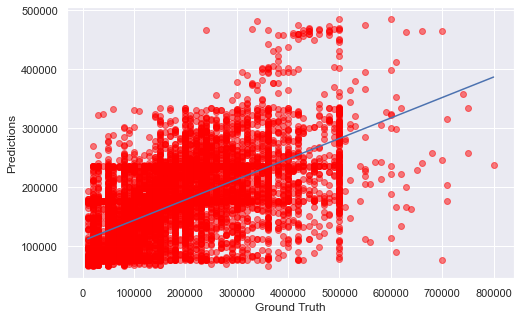

In [22]:
# Plot Real Credit Limits vs Predictions
sns.set()
plt.figure(figsize=(8, 5))
plt.scatter(y_test, rfPred1, c='red', alpha = 0.5)
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, rfPred1, 1))(np.unique(y_test)))

plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show()

This is a terrible model.

In [23]:
# Run RFR with max_depth = 7
rfFit2 = rf7.fit(X_train, y_train)
rfPred2 = rfFit2.predict(X_test)

# Calculate R Squared and Root Mean Squared Error
predR2 = r2_score(y_test, rfPred2)
rmse = sqrt(mean_squared_error(y_test, rfPred2))

print('R Squared: %.3f' % predR2)
print('RMSE: %.3f' % rmse)

R Squared: 0.447
RMSE: 96914.085


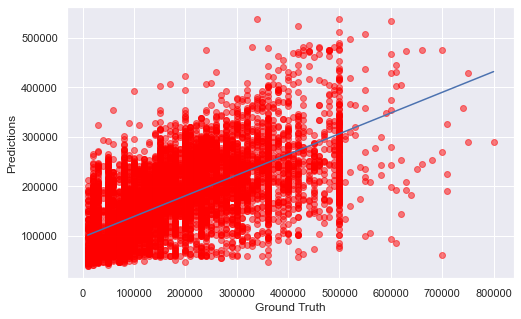

In [24]:
# Plot Real Credit Limits vs Predictions
plt.figure(figsize=(8, 5))
plt.scatter(y_test, rfPred2, c='red', alpha = 0.5)
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, rfPred2, 1))(np.unique(y_test)))

plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show()

This one is hardly much better, but we can see the predictions converged slightly toward reality.

In [25]:
# Run RFR with max_depth = 10
rfFit3 = rf10.fit(X_train, y_train)
rfPred3 = rfFit3.predict(X_test)

# Calculate R Squared and Root Mean Squared Error
predR2 = r2_score(y_test, rfPred3)
rmse = sqrt(mean_squared_error(y_test, rfPred3))

print('R Squared: %.3f' % predR2)
print('RMSE: %.3f' % rmse)

R Squared: 0.465
RMSE: 95312.069


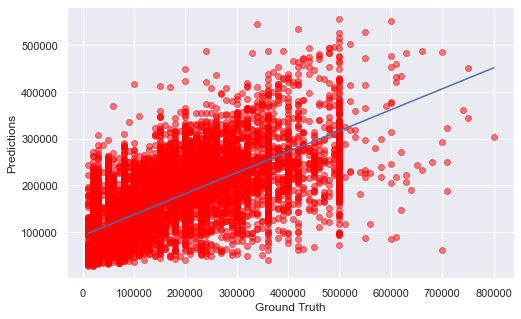

In [26]:
# Plot Real Credit Limits vs Predictions
plt.figure(figsize=(8, 5))
plt.scatter(y_test, rfPred3, c='red', alpha = 0.5)
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, rfPred3, 1))(np.unique(y_test)))

plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show()

In [27]:
# Run RFR with no max_depth
rfFit4 = rf.fit(X_train, y_train)
rfPred4 = rfFit4.predict(X_test)

# Calculate R Squared and Root Mean Squared Error
predR2 = r2_score(y_test, rfPred4)
rmse = sqrt(mean_squared_error(y_test, rfPred4))

print('R Squared: %.3f' % predR2)
print('RMSE: %.3f' % rmse)

R Squared: 0.463
RMSE: 95440.127


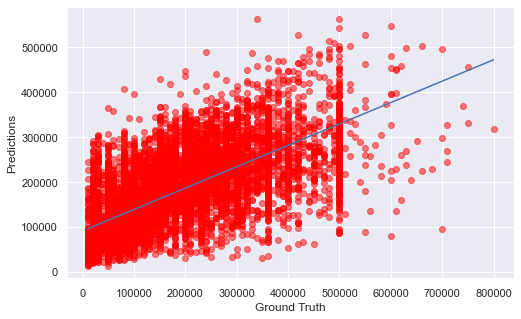

In [28]:
# Plot Real Credit Limits vs Predictions
plt.figure(figsize=(8, 5))
plt.scatter(y_test, rfPred4, c='red', alpha = 0.5)
plt.plot(np.unique(y_test), np.poly1d(np.polyfit(y_test, rfPred4, 1))(np.unique(y_test)))

plt.xlabel('Ground Truth')
plt.ylabel('Predictions')
plt.show()

## Discretize Credit Limit and Run Classification

In [29]:
# Create cross validation function for classification algorithms

def cv_clas(X, y):
    algos_Class = []
    algos_Class.append(('DTC', DecisionTreeClassifier()))
    algos_Class.append(('RFC', RandomForestClassifier()))
    algos_Class.append(('GBC', GradientBoostingClassifier()))
    results = []
    names = []
    for name, model in algos_Class:
        result = cross_val_score(model, X, y, cv=3, scoring='accuracy')
        names.append(name)
        results.append(result)
        print(name, result.mean())

In [30]:
credit['Credit Limit'].describe()

count      29965.000000
mean      167442.005006
std       129760.135222
min        10000.000000
25%        50000.000000
50%       140000.000000
75%       240000.000000
max      1000000.000000
Name: Credit Limit, dtype: float64

In [31]:
# Discretize Credit Limit
credit['cred_disc'] = pd.cut(x=credit['Credit Limit'], bins=[10000, 50000, 100000, 250000, 500000, 1000000], 
                             labels=['$50K','$100K','$250K','$500K','$1M'], include_lowest=True)
credit.head()

,Credit Limit,Sex,Highest Education: High School,Highest Education: University,Highest Education: Grad School,Highest Education: Other,Marital Status,Age,Dlq Sep,Dlq Aug,...,Paid Jun,Paid May,Paid Apr,Default?,Education,Age Decade,Avg Dlq Status,Avg Monthly Bill,Avg Monthly Payment,cred_disc
0,20000,0,0,1,0,0,1,24,2,2,...,0,0,0,1,university,20s,0.666667,1284.000000,114.833333,$50K
1,120000,0,0,1,0,0,0,26,0,2,...,1000,0,2000,1,university,20s,0.666667,2846.166667,833.333333,$250K
2,90000,0,0,1,0,0,0,34,0,0,...,1000,1000,5000,0,university,30s,0.000000,16942.166667,1836.333333,$100K
3,50000,0,0,1,0,0,1,37,0,0,...,1100,1069,1000,0,university,30s,0.000000,38555.666667,1398.000000,$50K
4,50000,1,0,1,0,0,1,57,0,0,...,9000,689,679,0,university,50s,0.000000,18223.166667,9841.500000,$50K


In [32]:
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29965 entries, 0 to 29964
Data columns (total 33 columns):
 #   Column                          Non-Null Count  Dtype   
---  ------                          --------------  -----   
 0   Credit Limit                    29965 non-null  int64   
 1   Sex                             29965 non-null  int64   
 2   Highest Education: High School  29965 non-null  int64   
 3   Highest Education: University   29965 non-null  int64   
 4   Highest Education: Grad School  29965 non-null  int64   
 5   Highest Education: Other        29965 non-null  int64   
 6   Marital Status                  29965 non-null  int64   
 7   Age                             29965 non-null  int64   
 8   Dlq Sep                         29965 non-null  int64   
 9   Dlq Aug                         29965 non-null  int64   
 10  Dlq Jul                         29965 non-null  int64   
 11  Dlq Jun                         29965 non-null  int64   
 12  Dlq May           

In [33]:
credit['cred_disc'].value_counts()

$250K    10767
$50K      7673
$500K     6502
$100K     4817
$1M        206
Name: cred_disc, dtype: int64

In [34]:
# Features = All
# Target = cred_disc (discretized Credit Limit)
X = credit.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]]
y = credit['cred_disc']
cv_clas(X, y)

DTC 0.4997496044206898
RFC 0.6022360345946688
GBC 0.6100451853332887


In [35]:
# Features = Sex, Education dummies, Marital, Age, Avg Dlq, Avg Bill, Avg Payment, Default
# Target = cred_disc (discretized Credit Limit)
X = credit.iloc[:,[1,2,3,4,5,6,7,29,30,31,26]]
y = credit['cred_disc']
cv_clas(X, y)

DTC 0.4681461381648768
RFC 0.5531785604934351
GBC 0.5755047312155507


In [36]:
# Features = Sex, Education dummies, Marital, Age, All Dlq, Avg Bill, Avg Payment, Default
# Target = cred_disc (discretized Credit Limit)
X = credit.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,30,31,26]]
y = credit['cred_disc']
cv_clas(X, y)

DTC 0.4693808196358138
RFC 0.5542130852013574
GBC 0.5764724957966378


In [37]:
# Features = Sex, Education dummies, Marital, Age, All Dlq, Avg Bill, All Payment, Default
# Target = cred_disc (discretized Credit Limit)
X = credit.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,30,20,21,22,23,24,25,26]]
y = credit['cred_disc']
cv_clas(X, y)

DTC 0.4684132655385615
RFC 0.5772401938220683
GBC 0.5831470183882286


In [38]:
# Features = Sex, Education dummies, Marital, Age, Default
# Target = cred_disc (discretized Credit Limit)
X = credit.iloc[:,[1,2,3,4,5,6,7,26]]
y = credit['cred_disc']
cv_clas(X, y)

DTC 0.41728678545465553
RFC 0.42055725655449666
GBC 0.4391791256057808


In [39]:
# Features = All Dlq, All Bill, All Payment, Default
# Target = cred_disc (discretized Credit Limit)
X = credit.iloc[:,[8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]]
y = credit['cred_disc']
cv_clas(X, y)

DTC 0.48673461712970373
RFC 0.587719091454478
GBC 0.5917239005624114


In [40]:
# Features = Grad School, Dlq May-Sep, All Bill  --- every feature with .25 or greater correlation to Credit Limit
# Target = cred_disc (discretized Credit Limit)
X = credit.iloc[:,[4,8,9,10,11,12,14,15,16,17,18,19]]
y = credit['cred_disc']
cv_clas(X, y)

DTC 0.47942617068335974
RFC 0.56576031191379
GBC 0.5734024854920176


In [41]:
# Re-discretize Credit Limit using quartiles
credit['cred_disc2'] = pd.cut(x=credit['Credit Limit'], bins=[10000, 50000, 140000, 240000, 1000000], 
                             labels=['$50K','$140K','$240K','$1M'], include_lowest=True)

In [42]:
credit['cred_disc2'].value_counts()

$50K     7673
$240K    7627
$140K    7607
$1M      7058
Name: cred_disc2, dtype: int64

In [43]:
# Features = Sex, Education dummies, Marital, Age, All Dlq, All Bill, All Payment, Default
# Target = cred_disc2 (discretized Credit Limit by quartiles)
X = credit.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]]
y = credit['cred_disc2']
cv_clas(X, y)

DTC 0.4825631215295308
RFC 0.5832804417525143
GBC 0.591690336743265


In [44]:
# Re-discretize Credit Limit with more, narrower bins
bins = [10000,20000,30000,40000,50000,75000,100000,125000,150000,175000,200000,225000,250000,300000,400000,500000,1000000]
labels = ['$20K','$30K','$40K','$50K','$75K','$100K','$125K','$150K','$175K','$200K','$225K','$250K','$300K','$400K','$500K',
          '$1M']

credit['cred_disc3'] = pd.cut(x=credit['Credit Limit'], bins=bins, labels=labels, include_lowest=True)

In [45]:
credit['cred_disc3'].value_counts(sort=False)

$20K     2470
$30K     1610
$40K      230
$50K     3363
$75K     1556
$100K    3261
$125K    1313
$150K    2584
$175K    1224
$200K    2746
$225K    1195
$250K    1705
$300K    2153
$400K    2752
$500K    1597
$1M       206
Name: cred_disc3, dtype: int64

In [46]:
# Features = Sex, Education dummies, Marital, Age, All Dlq, All Bill, All Payment, Default
# Target = cred_disc3 (discretized Credit Limit)
X = credit.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]]
y = credit['cred_disc3']
cv_clas(X, y)

DTC 0.24528616440038387
RFC 0.34256646401283036
GBC 0.34870694234088684


In [47]:
# Re-discretize Credit Limit with fewer bins based on group size
bins = [10000,30000,50000,100000,150000,200000,300000,1000000]
labels = ['$30K','$50K','$100K','$150K','$200K','$300K','$1M']

credit['cred_disc4'] = pd.cut(x=credit['Credit Limit'], bins=bins, labels=labels, include_lowest=True)

In [48]:
credit['cred_disc4'].value_counts(sort=False)

$30K     4080
$50K     3593
$100K    4817
$150K    3897
$200K    3970
$300K    5053
$1M      4555
Name: cred_disc4, dtype: int64

In [49]:
# Features = Sex, Education dummies, Marital, Age, All Dlq, All Bill, All Payment, Default
# Target = cred_disc4 (discretized Credit Limit)
X = credit.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]]
y = credit['cred_disc4']
cv_clas(X, y)

DTC 0.341632046085028
RFC 0.4525615007371812
GBC 0.4610048459526277


Once again, using all of the available features returns the best result. Fewer bins in the discretized target yield better accuracy. GradientBooster had the highest accuracy.

## Making Predictions and Evaluating Results - Classification of 'Credit Limit'

In [50]:
# Algorithm iterations to save some keystrokes
gb = GradientBoostingClassifier()
gb4 = GradientBoostingClassifier(max_depth=4)
gb7 = GradientBoostingClassifier(max_depth=7)
gb10 = GradientBoostingClassifier(max_depth=10)

In [51]:
# Features = Sex, Education dummies, Marital, Age, All Dlq, All Bill, All Payment, Default
# Target = cred_disc (discretized Credit Limit)
X = credit.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]]
y = credit['cred_disc']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 2395)

gbFit1 = gb.fit(X_train, y_train)
gbPred1 = gbFit1.predict(X_test)
print(classification_report(y_test, gbPred1, target_names=['Under $50K', '$50K-$100K', '$100K-$250K', 
                                                           '$250K-$500K', 'Over $500K'], zero_division=0))

              precision    recall  f1-score   support

  Under $50K       0.59      0.39      0.47      1424
  $50K-$100K       0.23      0.08      0.11        66
 $100K-$250K       0.55      0.72      0.62      3193
 $250K-$500K       0.63      0.37      0.47      2012
  Over $500K       0.72      0.82      0.77      2295

    accuracy                           0.61      8990
   macro avg       0.54      0.48      0.49      8990
weighted avg       0.61      0.61      0.60      8990



In [52]:
gbFit2 = gb4.fit(X_train, y_train)
gbPred2 = gbFit2.predict(X_test)
print(classification_report(y_test, gbPred2, target_names=['Under $50K', '$50K-$100K', '$100K-$250K', 
                                                           '$250K-$500K', 'Over $500K'], zero_division=0))

              precision    recall  f1-score   support

  Under $50K       0.60      0.41      0.48      1424
  $50K-$100K       0.14      0.06      0.08        66
 $100K-$250K       0.55      0.71      0.62      3193
 $250K-$500K       0.61      0.38      0.47      2012
  Over $500K       0.73      0.82      0.77      2295

    accuracy                           0.61      8990
   macro avg       0.52      0.48      0.48      8990
weighted avg       0.61      0.61      0.60      8990



In [53]:
gbFit3 = gb7.fit(X_train, y_train)
gbPred3 = gbFit3.predict(X_test)
print(classification_report(y_test, gbPred3, target_names=['Under $50K', '$50K-$100K', '$100K-$250K', 
                                                           '$250K-$500K', 'Over $500K'], zero_division=0))

              precision    recall  f1-score   support

  Under $50K       0.58      0.41      0.48      1424
  $50K-$100K       0.15      0.12      0.13        66
 $100K-$250K       0.56      0.70      0.62      3193
 $250K-$500K       0.60      0.42      0.49      2012
  Over $500K       0.73      0.81      0.76      2295

    accuracy                           0.61      8990
   macro avg       0.52      0.49      0.50      8990
weighted avg       0.61      0.61      0.60      8990



In [54]:
gbFit4 = gb10.fit(X_train, y_train)
gbPred4 = gbFit4.predict(X_test)
print(classification_report(y_test, gbPred4, target_names=['Under $50K', '$50K-$100K', '$100K-$250K', 
                                                           '$250K-$500K', 'Over $500K'], zero_division=0))

              precision    recall  f1-score   support

  Under $50K       0.57      0.40      0.47      1424
  $50K-$100K       0.21      0.17      0.18        66
 $100K-$250K       0.55      0.69      0.61      3193
 $250K-$500K       0.56      0.41      0.47      2012
  Over $500K       0.73      0.80      0.76      2295

    accuracy                           0.60      8990
   macro avg       0.52      0.49      0.50      8990
weighted avg       0.60      0.60      0.59      8990



In [55]:
# Features = Sex, Education dummies, Marital, Age, All Dlq, All Bill, All Payment, Default
# Target = cred_disc2 (discretized Credit Limit using quartiles)
X = credit.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]]
y = credit['cred_disc2']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 2395)

gbFit5 = gb.fit(X_train, y_train)
gbPred5 = gbFit5.predict(X_test)
print(classification_report(y_test, gbPred5, target_names=['Under $50K', '$50K-$140K', '$140K-$240K', 
                                                           'Over $240K'], zero_division=0))

              precision    recall  f1-score   support

  Under $50K       0.60      0.54      0.57      2250
  $50K-$140K       0.61      0.50      0.55      2191
 $140K-$240K       0.45      0.50      0.47      2254
  Over $240K       0.72      0.82      0.76      2295

    accuracy                           0.59      8990
   macro avg       0.59      0.59      0.59      8990
weighted avg       0.59      0.59      0.59      8990



In [56]:
# Features = Sex, Education dummies, Marital, Age, All Dlq, All Bill, All Payment, Default
# Target = cred_disc4 (discretized Credit Limit)
X = credit.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]]
y = credit['cred_disc4']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 2395)

gbFit6 = gb.fit(X_train, y_train)
gbPred6 = gbFit6.predict(X_test)
print(classification_report(y_test, gbPred6, target_names=['Under $30K', '$30K-$50K', '$50K-$100K', '$100K-$150K', '$150K-$200K',
                                                           '$200K-$300K','Over $300K'], zero_division=0))

              precision    recall  f1-score   support

  Under $30K       0.48      0.50      0.49      1424
   $30K-$50K       0.43      0.29      0.34      1128
  $50K-$100K       0.49      0.44      0.46      1407
 $100K-$150K       0.30      0.24      0.27      1163
 $150K-$200K       0.36      0.43      0.39      1573
 $200K-$300K       0.57      0.84      0.67      1213
  Over $300K       0.63      0.49      0.55      1082

    accuracy                           0.46      8990
   macro avg       0.46      0.46      0.45      8990
weighted avg       0.46      0.46      0.45      8990



##### Conclusion: Using the data available to us, there's not a way to build a reliable model for determining appropriate credit limit through regression or classification. But we may still be able to build a reliable model to determine whether or not a customer should receive credit at all.

## Test Classification Algorithms Using 'Default' as the Dependent Variable

In [57]:
# Features = Credit Limit, Sex, Education dummies, Marital, Age, All Dlq, All Bill, All Payment
# Target = Default
X = credit.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]]
y = credit['Default?']
cv_clas(X, y)

DTC 0.7276824056589066
RFC 0.8153182089939836
GBC 0.8202239223257718


Using all data points available to us we can create an acceptably reliable model for predicting whether a customer will default on their loan. But would Credit One have all of these data points for a new potential customer? Let's assume we can't use Credit Limit, since Credit One would not yet have issued one to a new customer. Perhaps they still would have prior credit history of a new customer by checking their credit report so would be able to see late or insufficient payments.

In [58]:
# Features = Sex, Education dummies, Marital, Age, All Dlq, All Bill, All Payment
# Target = Default
X = credit.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]]
y = credit['Default?']
cv_clas(X, y)

DTC 0.7217755042494414
RFC 0.8136161899301353
GBC 0.8205242693942378


That didn't have a big impact on the efficacy of the algorithms. But what about a brand new customer with no credit history at all? All Credit One would have to go by would be demographic information (and income, of course, but we don't have that data point available to us). Let's see what kind of accuracy we can get from just demographic variables.

In [59]:
# Features = Sex, Education dummies, Marital, Age
# Target = Default
X = credit.iloc[:,[1,2,3,4,5,6,7]]
y = credit['Default?']
cv_clas(X, y)

DTC 0.7739361983270371
RFC 0.7732020039825146
GBC 0.7782746443594962


Using only known demographic variables we can get accuracy scores that are still pretty good, but they appear to be in line with the current success rate (currently about 22% of customers granted loans end up in default, 78% remained in good standing). In this case, the most important figure is not necessarily overall accuracy. Credit One's interest is in having the fewest number possible of customers who are granted loans end up in default. That means they need a high precision score for true 'Not Defaults' (low false positives when predicting Not Default=True) and a high recall score for true 'Defaults' (low false negatives when predicting Default=False).

## Making Predictions and Evaluating Results - Classification of 'Default'

In [60]:
# Features = Sex, Education dummies, Marital, Age
# Target = Default
X = credit.iloc[:,[1,2,3,4,5,6,7]]
y = credit['Default?']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 2395)

gbFit7 = gb.fit(X_train, y_train)
gbPred7 = gbFit7.predict(X_test)
print(classification_report(y_test, gbPred7, target_names=['Not Default', 'Default']))

              precision    recall  f1-score   support

 Not Default       0.78      1.00      0.87      6981
     Default       0.00      0.00      0.00      2009

    accuracy                           0.78      8990
   macro avg       0.39      0.50      0.44      8990
weighted avg       0.60      0.78      0.68      8990



In [61]:
# Features = Sex, Education dummies, Marital, Age
# Target = Default
X = credit.iloc[:,[1,2,3,4,5,6,7]]
y = credit['Default?']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 2395)

gbFit8 = gb7.fit(X_train, y_train)
gbPred8 = gbFit8.predict(X_test)
print(classification_report(y_test, gbPred8, target_names=['Not Default', 'Default']))

              precision    recall  f1-score   support

 Not Default       0.78      0.99      0.87      6981
     Default       0.27      0.01      0.02      2009

    accuracy                           0.77      8990
   macro avg       0.52      0.50      0.44      8990
weighted avg       0.66      0.77      0.68      8990



Poor performance on the minority class. I will try to balance the data with RandomOverSampler and rerun the algorithm.

In [62]:
# Establish notation for the module
ovs = RandomOverSampler(random_state=2395)

In [63]:
# Resample the data
X_bal, y_bal = ovs.fit_resample(X, y)

In [64]:
print('Original Dataset Shape {}'.format(Counter(y)))
print('Resampled Dataset Shape {}'.format(Counter(y_bal)))

Original Dataset Shape Counter({0: 23335, 1: 6630})
Resampled Dataset Shape Counter({1: 23335, 0: 23335})


In [65]:
# Features = Resampled X (Sex, Education dummies, Marital, Age)
# Target = Resampled y (Default)
X = X_bal
y = y_bal
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 2395)

gbFit9 = gb10.fit(X_train, y_train)
gbPred9 = gbFit9.predict(X_test)
print(classification_report(y_test, gbPred9, target_names=['Not Default', 'Default']))

              precision    recall  f1-score   support

 Not Default       0.58      0.54      0.56      7055
     Default       0.56      0.60      0.58      6946

    accuracy                           0.57     14001
   macro avg       0.57      0.57      0.57     14001
weighted avg       0.57      0.57      0.57     14001



In [66]:
# Run cross validation on balanced data sample to see if another algorithm might be more appropriate
cv_clas(X_bal, y_bal)

DTC 0.5578530532512705
RFC 0.5590529969283957
GBC 0.5489393762112128


The model for predicting credibility using only demographic data is not very reliable. The data we have regarding credit history is needed to make a successful prediction. I'll try making a model using all features and then balance the target if need be.

In [67]:
# Features = Credit Limit, Sex, Education dummies, Marital, Age, All Dlq, All Bill, All Payment
# Target = Default
X = credit.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]]
y = credit['Default?']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 2395)

gbFit10 = gb.fit(X_train, y_train)
gbPred10 = gbFit10.predict(X_test)
print(classification_report(y_test, gbPred10, target_names=['Not Default', 'Default']))

              precision    recall  f1-score   support

 Not Default       0.84      0.95      0.89      6981
     Default       0.69      0.38      0.49      2009

    accuracy                           0.82      8990
   macro avg       0.77      0.67      0.69      8990
weighted avg       0.81      0.82      0.80      8990



In [68]:
# Resample the data
X_bal, y_bal = ovs.fit_resample(X, y)

In [69]:
print('Original Dataset Shape {}'.format(Counter(y)))
print('Resampled Dataset Shape {}'.format(Counter(y_bal)))

Original Dataset Shape Counter({0: 23335, 1: 6630})
Resampled Dataset Shape Counter({1: 23335, 0: 23335})


In [70]:
# Features = Resampled X (Credit Limit, Sex, Education dummies, Marital, Age, All Dlq, All Bill, All Payment)
# Target = Resampled y (Default)
X = X_bal
y = y_bal
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 2395)

rfFit011 = RandomForestClassifier().fit(X_train, y_train)
rfPred011 = rfFit011.predict(X_test)
print(classification_report(y_test, rfPred011, target_names=['Not Default', 'Default']))

              precision    recall  f1-score   support

 Not Default       0.95      0.89      0.92      7055
     Default       0.90      0.96      0.92      6946

    accuracy                           0.92     14001
   macro avg       0.92      0.92      0.92     14001
weighted avg       0.93      0.92      0.92     14001



In [71]:
cv_clas(X_bal, y_bal)

DTC 0.8673883052923067
RFC 0.9303838772955141
GBC 0.7186846663837961


This is a very strongly performing model. It maintains 92% accuracy on test data and has high precision and recall for both classes.

In [72]:
# Features = Resampled X (Credit Limit, Sex, Education dummies, Marital, Age, All Dlq, All Bill, All Payment)
# Target = Resampled y (Default)
X = X_bal
y = y_bal
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 2395)

dtFit1 = DecisionTreeClassifier().fit(X_train, y_train)
dtPred1 = dtFit1.predict(X_test)
print(classification_report(y_test, dtPred1, target_names=['Not Default', 'Default']))

              precision    recall  f1-score   support

 Not Default       0.95      0.79      0.86      7055
     Default       0.82      0.96      0.88      6946

    accuracy                           0.87     14001
   macro avg       0.88      0.87      0.87     14001
weighted avg       0.88      0.87      0.87     14001



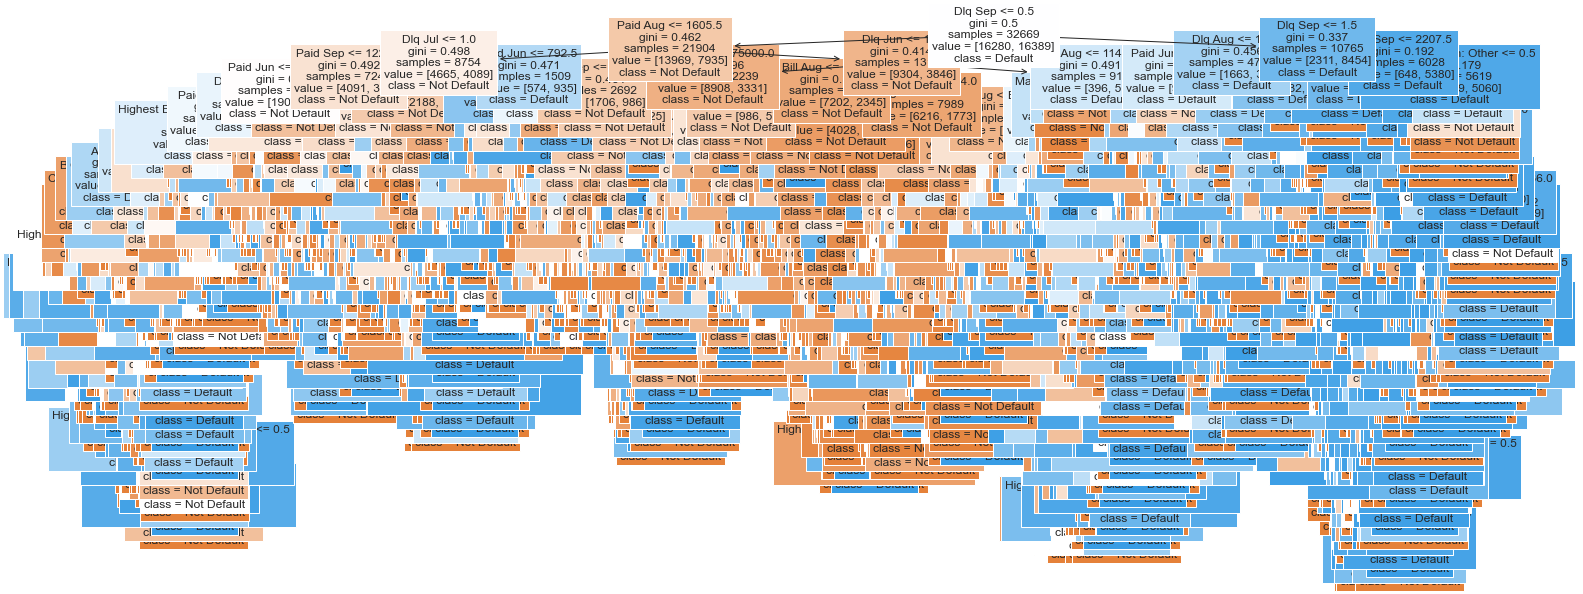

In [73]:
fig = plt.figure(figsize=(25,10))
tree = plot_tree(dtFit1, feature_names=X.columns, class_names=['Not Default', 'Default'], filled=True, fontsize=12)

In [74]:
# Features = Resampled X (Credit Limit, Sex, Education dummies, Marital, Age, All Dlq, All Bill, All Payment)
# Target = Resampled y (Default)
X = X_bal
y = y_bal
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 2395)

dtFit2 = DecisionTreeClassifier(max_depth=10).fit(X_train, y_train)
dtPred2 = dtFit2.predict(X_test)
print(classification_report(y_test, dtPred2, target_names=['Not Default', 'Default']))

              precision    recall  f1-score   support

 Not Default       0.74      0.71      0.72      7055
     Default       0.72      0.75      0.73      6946

    accuracy                           0.73     14001
   macro avg       0.73      0.73      0.73     14001
weighted avg       0.73      0.73      0.73     14001



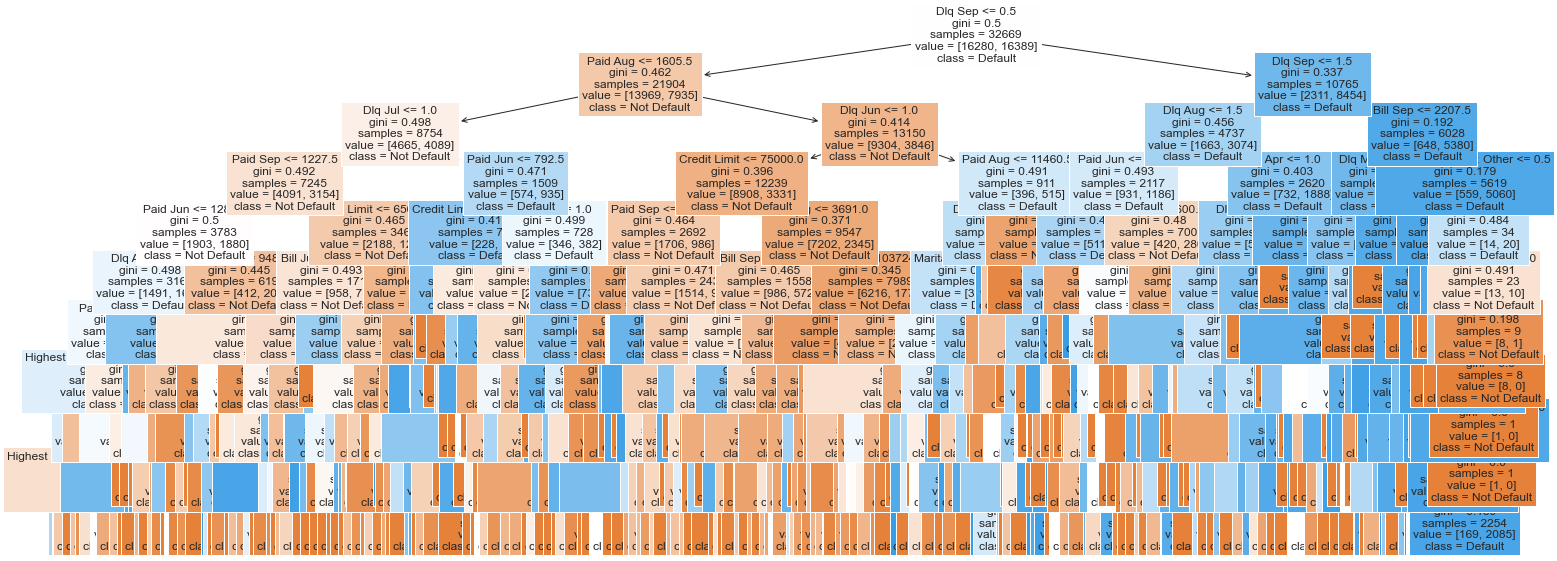

In [75]:
fig = plt.figure(figsize=(25,10))
tree = plot_tree(dtFit2, feature_names=X.columns, class_names=['Not Default', 'Default'], filled=True, fontsize=12)

In [76]:
# Features = Credit Limit, Sex, Education dummies, Marital, Age, Avg Dlq, Avg Bill, Avg Payment
# Target = Default
X = credit.iloc[:,[0,1,2,3,4,5,6,7,29,30,31]]
y = credit['Default?']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 2395)

gbFit12 = gb.fit(X_train, y_train)
gbPred12 = gbFit12.predict(X_test)
print(classification_report(y_test, gbPred12, target_names=['Not Default', 'Default']))

              precision    recall  f1-score   support

 Not Default       0.83      0.95      0.88      6981
     Default       0.63      0.33      0.43      2009

    accuracy                           0.81      8990
   macro avg       0.73      0.64      0.66      8990
weighted avg       0.79      0.81      0.78      8990



In [77]:
# Features = Credit Limit, Sex, Education dummies, Marital, Age, Avg Dlq, Avg Bill, Avg Payment
# Target = Default
X = credit.iloc[:,[0,1,2,3,4,5,6,7,29,30,31]]
y = credit['Default?']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 2395)

dtFit3 = DecisionTreeClassifier().fit(X_train, y_train)
dtPred3 = dtFit3.predict(X_test)
print(classification_report(y_test, dtPred3, target_names=['Not Default', 'Default']))

              precision    recall  f1-score   support

 Not Default       0.82      0.80      0.81      6981
     Default       0.36      0.39      0.37      2009

    accuracy                           0.71      8990
   macro avg       0.59      0.59      0.59      8990
weighted avg       0.72      0.71      0.71      8990



In [78]:
# Resample the data
X_bal2, y_bal2 = ovs.fit_resample(X, y)

In [79]:
# Features = Credit Limit, Sex, Education dummies, Marital, Age, Avg Dlq, Avg Bill, Avg Payment
# Target = Default
X = X_bal2
y = y_bal2
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 2395)

dtFit4 = DecisionTreeClassifier(max_depth=10).fit(X_train, y_train)
dtPred4 = dtFit4.predict(X_test)
print(classification_report(y_test, dtPred4, target_names=['Not Default', 'Default']))

              precision    recall  f1-score   support

 Not Default       0.72      0.74      0.73      7055
     Default       0.73      0.71      0.72      6946

    accuracy                           0.73     14001
   macro avg       0.73      0.73      0.73     14001
weighted avg       0.73      0.73      0.73     14001



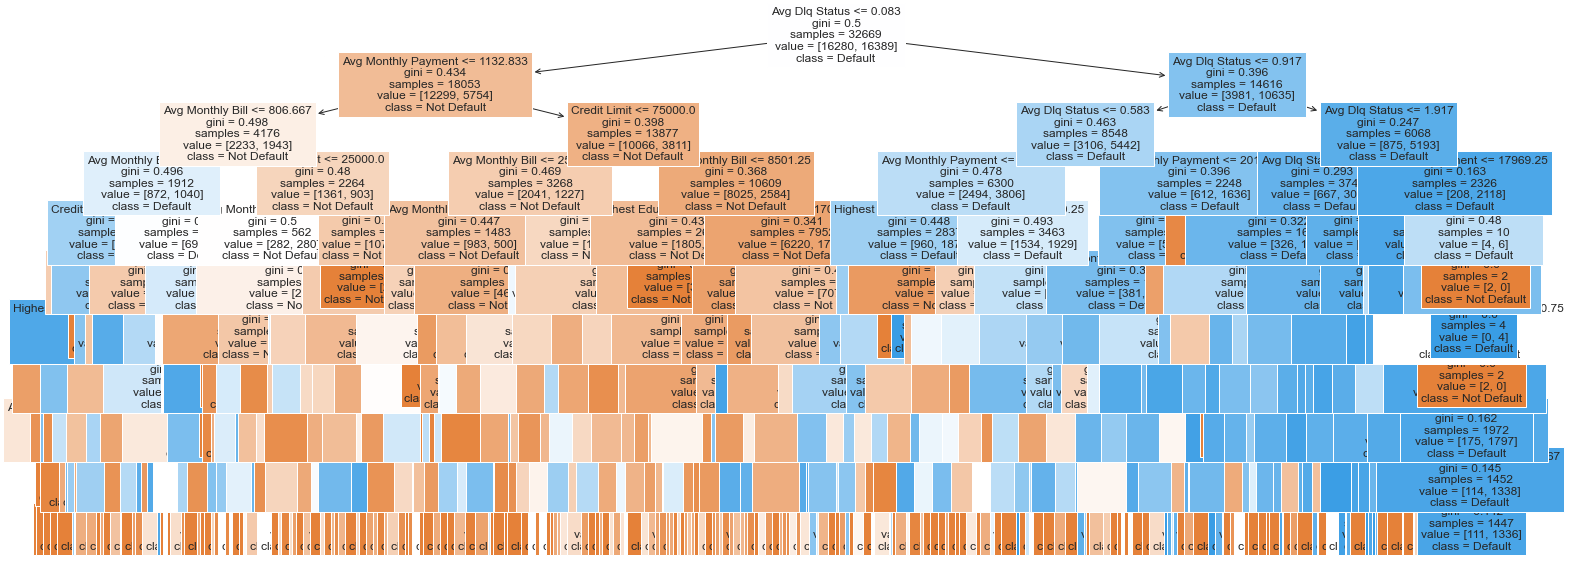

In [80]:
fig = plt.figure(figsize=(25,10))
tree = plot_tree(dtFit4, feature_names=X.columns, class_names=['Not Default', 'Default'], filled=True, fontsize=12)

## ========================================================================

## Import Modified Data Set

I'm rethinking changing all -2 through 0 values in the Dlq columns to 0. I want to run my models on unedited values, so I'm importing a data set that has those numbers as they originally were.

In [81]:
cred = pd.read_csv('Credit_One_Data_Clean_for_Task3.csv')

In [82]:
cred.head()

,Credit Limit,Sex,Highest Education: High School,Highest Education: University,Highest Education: Grad School,Highest Education: Other,Marital Status,Age,Dlq Sep,Dlq Aug,...,Bill Jun,Bill May,Bill Apr,Paid Sep,Paid Aug,Paid Jul,Paid Jun,Paid May,Paid Apr,Default?
0,20000,0,0,1,0,0,1,24,2,2,...,0,0,0,0,689,0,0,0,0,1
1,120000,0,0,1,0,0,0,26,-1,2,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,0,0,1,0,0,0,34,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,0,0,1,0,0,1,37,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,1,0,1,0,0,1,57,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [83]:
cred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29965 entries, 0 to 29964
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   Credit Limit                    29965 non-null  int64
 1   Sex                             29965 non-null  int64
 2   Highest Education: High School  29965 non-null  int64
 3   Highest Education: University   29965 non-null  int64
 4   Highest Education: Grad School  29965 non-null  int64
 5   Highest Education: Other        29965 non-null  int64
 6   Marital Status                  29965 non-null  int64
 7   Age                             29965 non-null  int64
 8   Dlq Sep                         29965 non-null  int64
 9   Dlq Aug                         29965 non-null  int64
 10  Dlq Jul                         29965 non-null  int64
 11  Dlq Jun                         29965 non-null  int64
 12  Dlq May                         29965 non-null  int64
 13  D

In [84]:
# Features = Sex, Education dummies, Marital, Age, All Dlq, All Bill, All Payment, Default
# Target = Credit Limit
X = cred.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]]
y = cred['Credit Limit']
cv_regr(X, y)

RFR 0.46731989867591867
LinR 0.35491348268295564
LogR -2.098673310294314
SVR -0.05032325984020695
ABR -0.09638982682677082


While it wasn't enough to make the models good, it definitely had a positive effect on the Linear Regression R-squared score. Here are the previous numbers:

RFR 0.46497179906816893

LinR 0.28188269086940687

SVR -0.0503232564324303

Let's see if it affects my classification model.

In [85]:
# Features = Credit Limit, Sex, Education dummies, Marital, Age, All Dlq, All Bill, All Payment
# Target = Default
X = cred.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25]]
y = cred['Default?']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 2395)

gbFit13 = gb.fit(X_train, y_train)
gbPred13 = gbFit13.predict(X_test)
print(classification_report(y_test, gbPred13, target_names=['Not Default', 'Default']))

              precision    recall  f1-score   support

 Not Default       0.84      0.95      0.89      6981
     Default       0.69      0.38      0.49      2009

    accuracy                           0.82      8990
   macro avg       0.77      0.67      0.69      8990
weighted avg       0.81      0.82      0.80      8990



In [86]:
gbConfM13 = confusion_matrix(y_test, gbPred13)
print(gbConfM13)

[[6642  339]
 [1242  767]]


In [87]:
cv_clas(X, y)

DTC 0.7285501837363512
RFC 0.8160523565643206
GBC 0.8205242827582908


In [88]:
# Resample the data
X_bal, y_bal = ovs.fit_resample(X, y)

In [89]:
# Features = Resampled X (Credit Limit, Sex, Education dummies, Marital, Age, All Dlq, All Bill, All Payment)
# Target = Resampled y (Default)
X = X_bal
y = y_bal
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 2395)

gbFit14 = GradientBoostingClassifier(max_depth=20).fit(X_train, y_train)
gbPred14 = gbFit14.predict(X_test)
print(classification_report(y_test, gbPred14, target_names=['Not Default', 'Default']))

              precision    recall  f1-score   support

 Not Default       0.95      0.89      0.92      7055
     Default       0.89      0.96      0.92      6946

    accuracy                           0.92     14001
   macro avg       0.92      0.92      0.92     14001
weighted avg       0.92      0.92      0.92     14001



In [90]:
gbConfM14 = confusion_matrix(y_test, gbPred14)
print(gbConfM14)

[[6253  802]
 [ 312 6634]]


In [91]:
cv_clas(X_bal, y_bal)

DTC 0.8694452709206151
RFC 0.9302981806099307
GBC 0.7200559662427262


Not much effect on the classification model, but I'm glad I tested it nonetheless.

Gradient Booster is computationally expensive and seems to be underfitting. Let's see if I can get better results from Random Forest or Decision Tree.

In [92]:
# Features = Resampled X (Credit Limit, Sex, Education dummies, Marital, Age, All Dlq, All Bill, All Payment)
# Target = Resampled y (Default)
X = X_bal
y = y_bal
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 2395)

rfFit1 = RandomForestClassifier().fit(X_train, y_train)
rfPred1 = rfFit1.predict(X_test)
print(classification_report(y_test, rfPred1, target_names=['Not Default', 'Default']))

              precision    recall  f1-score   support

 Not Default       0.95      0.89      0.92      7055
     Default       0.89      0.96      0.92      6946

    accuracy                           0.92     14001
   macro avg       0.92      0.92      0.92     14001
weighted avg       0.92      0.92      0.92     14001



In [93]:
# Checking for overfit using out of bag samples. Best possible score is 1.
rf_oob = RandomForestClassifier(oob_score=True)
rf_oob.fit(X_train, y_train)
print(rf_oob.oob_score_)

0.9200465272888672


In [94]:
rfConfM1 = confusion_matrix(y_test, rfPred1)
print(rfConfM1)

[[6261  794]
 [ 301 6645]]


In [95]:
# Features = Resampled X (Credit Limit, Sex, Education dummies, Marital, Age, All Dlq, All Bill, All Payment)
# Target = Resampled y (Default)
X = X_bal
y = y_bal
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 2395)

dtFit5 = DecisionTreeClassifier().fit(X_train, y_train)
dtPred5 = dtFit5.predict(X_test)
print(classification_report(y_test, dtPred5, target_names=['Not Default', 'Default']))

              precision    recall  f1-score   support

 Not Default       0.95      0.79      0.86      7055
     Default       0.81      0.96      0.88      6946

    accuracy                           0.87     14001
   macro avg       0.88      0.87      0.87     14001
weighted avg       0.88      0.87      0.87     14001



<b> Best result is Random Forest on an oversampled dataset to balance the y variable. Able to get 92% accuracy on test data, with 90% precision and 96% recall. </b>

In [96]:
# Features with highest correlation to Default are Dlqs.
X = cred.iloc[:,[8,9,10,11,12,13]]
y = cred['Default?']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 2395)

rfFit2 = RandomForestClassifier().fit(X_train, y_train)
rfPred2 = rfFit2.predict(X_test)
print(classification_report(y_test, rfPred2, target_names=['Not Default', 'Default']))

              precision    recall  f1-score   support

 Not Default       0.84      0.95      0.89      6981
     Default       0.68      0.38      0.49      2009

    accuracy                           0.82      8990
   macro avg       0.76      0.67      0.69      8990
weighted avg       0.81      0.82      0.80      8990



In [97]:
rfConfM2 = confusion_matrix(y_test, rfPred2)
print(rfConfM2)

[[6612  369]
 [1238  771]]


In [98]:
# Resample the data
X_bal, y_bal = ovs.fit_resample(X, y)

In [99]:
X = X_bal
y = y_bal
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 2395)

rfFit3 = RandomForestClassifier().fit(X_train, y_train)
rfPred3 = rfFit3.predict(X_test)
print(classification_report(y_test, rfPred3, target_names=['Not Default', 'Default']))

              precision    recall  f1-score   support

 Not Default       0.67      0.82      0.74      7055
     Default       0.76      0.60      0.67      6946

    accuracy                           0.71     14001
   macro avg       0.72      0.71      0.70     14001
weighted avg       0.72      0.71      0.70     14001



In [100]:
# Features = Credit Limit, All Dlq
X = cred.iloc[:,[0,8,9,10,11,12,13]]
y = cred['Default?']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 2395)

rfFit4 = RandomForestClassifier().fit(X_train, y_train)
rfPred4 = rfFit4.predict(X_test)
print(classification_report(y_test, rfPred4, target_names=['Not Default', 'Default']))

              precision    recall  f1-score   support

 Not Default       0.84      0.92      0.88      6981
     Default       0.59      0.38      0.46      2009

    accuracy                           0.80      8990
   macro avg       0.71      0.65      0.67      8990
weighted avg       0.78      0.80      0.79      8990



In [101]:
# Resample the data
X_bal, y_bal = ovs.fit_resample(X, y)

In [102]:
X = X_bal
y = y_bal
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 2395)

rfFit5 = RandomForestClassifier().fit(X_train, y_train)
rfPred5 = rfFit5.predict(X_test)
print(classification_report(y_test, rfPred5, target_names=['Not Default', 'Default']))

              precision    recall  f1-score   support

 Not Default       0.73      0.79      0.76      7055
     Default       0.77      0.71      0.74      6946

    accuracy                           0.75     14001
   macro avg       0.75      0.75      0.75     14001
weighted avg       0.75      0.75      0.75     14001



In [103]:
# Features Credit Limit, all Demo, all Dlq
X = cred.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13]]
y = cred['Default?']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 2395)

rfFit6 = RandomForestClassifier().fit(X_train, y_train)
rfPred6 = rfFit6.predict(X_test)
print(classification_report(y_test, rfPred6, target_names=['Not Default', 'Default']))

              precision    recall  f1-score   support

 Not Default       0.83      0.91      0.87      6981
     Default       0.55      0.37      0.44      2009

    accuracy                           0.79      8990
   macro avg       0.69      0.64      0.66      8990
weighted avg       0.77      0.79      0.77      8990



In [104]:
# Resample the data
X_bal, y_bal = ovs.fit_resample(X, y)

In [105]:
X = X_bal
y = y_bal
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 2395)

rfFit7 = RandomForestClassifier().fit(X_train, y_train)
rfPred7 = rfFit7.predict(X_test)
print(classification_report(y_test, rfPred7, target_names=['Not Default', 'Default']))

              precision    recall  f1-score   support

 Not Default       0.91      0.81      0.86      7055
     Default       0.83      0.92      0.87      6946

    accuracy                           0.87     14001
   macro avg       0.87      0.87      0.86     14001
weighted avg       0.87      0.87      0.86     14001



In [106]:
# Checking for overfit using out of bag samples. Best possible score is 1.
rf_oob = RandomForestClassifier(oob_score=True)
rf_oob.fit(X_train, y_train)
print(rf_oob.oob_score_)

0.863785239829808


In [107]:
# Features Credit Limit, all Demo, all Dlq, all Paid
X = cred.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12,13,20,21,22,23,24,25]]
y = cred['Default?']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 2395)

rfFit8 = RandomForestClassifier().fit(X_train, y_train)
rfPred8 = rfFit8.predict(X_test)
print(classification_report(y_test, rfPred8, target_names=['Not Default', 'Default']))

              precision    recall  f1-score   support

 Not Default       0.84      0.95      0.89      6981
     Default       0.67      0.38      0.48      2009

    accuracy                           0.82      8990
   macro avg       0.75      0.66      0.69      8990
weighted avg       0.80      0.82      0.80      8990



In [108]:
# Resample the data
X_bal, y_bal = ovs.fit_resample(X, y)

In [109]:
X = X_bal
y = y_bal
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 2395)

rfFit9 = RandomForestClassifier().fit(X_train, y_train)
rfPred9 = rfFit9.predict(X_test)
print(classification_report(y_test, rfPred9, target_names=['Not Default', 'Default']))

              precision    recall  f1-score   support

 Not Default       0.96      0.89      0.92      7055
     Default       0.90      0.96      0.93      6946

    accuracy                           0.92     14001
   macro avg       0.93      0.92      0.92     14001
weighted avg       0.93      0.92      0.92     14001



In [110]:
# Checking for overfit using out of bag samples. Best possible score is 1.
rf_oob = RandomForestClassifier(oob_score=True)
rf_oob.fit(X_train, y_train)
print(rf_oob.oob_score_)

0.9200771373473323


In [111]:
cv_clas(X_bal, y_bal)

DTC 0.8697881719858005
RFC 0.9299553497913172
GBC 0.7170347562242031


The model is practically unaffected by the Monthly Bill amounts. They can be left out of the features for the Default Classification.

In [112]:
rfConfM9 = confusion_matrix(y_test, rfPred9)
print(rfConfM9)

[[6277  778]
 [ 293 6653]]


In [113]:
dfConfM1 = pd.DataFrame(rfConfM9)
dfConfM1

,0,1
0,6277,778
1,293,6653


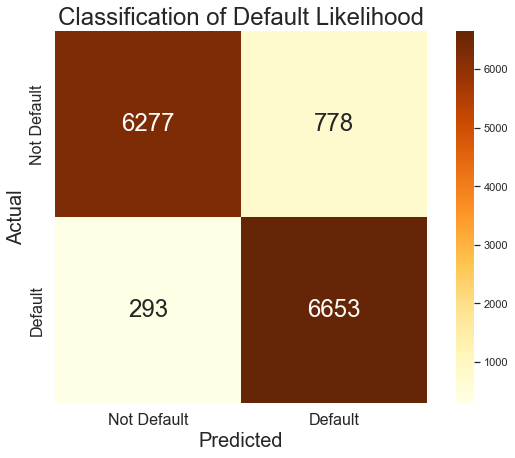

In [114]:
fig, ax = plt.subplots(figsize=(8,6))

sns.heatmap(dfConfM1, xticklabels=['Not Default', 'Default'], yticklabels=['Not Default', 'Default'], annot=True, fmt='1g',
            annot_kws={'fontsize': 24}, square=True, cmap='YlOrBr')

ax.set_xlabel('Predicted', fontsize=20)
ax.set_ylabel('Actual', fontsize=20)
ax.set_title('Classification of Default Likelihood', fontsize=24)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
fig.tight_layout(pad=-.5)

plt.show()

## Revisiting Credit Limit Classification with Oversampling

Can I apply the oversampling method to the discretized Credit Limit target variable to build a better model?

In [115]:
credit['cred_disc'].value_counts(sort=False)

$50K      7673
$100K     4817
$250K    10767
$500K     6502
$1M        206
Name: cred_disc, dtype: int64

In [116]:
# Features = All
X = credit.iloc[:,[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]]
y = credit['cred_disc']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 2395)

rfFit10 = RandomForestClassifier().fit(X_train, y_train)
rfPred10 = rfFit10.predict(X_test)
print(classification_report(y_test, rfPred10, target_names=['$50K','$100K','$250K','$500K','$1M']))

              precision    recall  f1-score   support

        $50K       0.58      0.39      0.47      1424
       $100K       0.50      0.02      0.03        66
       $250K       0.55      0.69      0.61      3193
       $500K       0.59      0.39      0.47      2012
         $1M       0.71      0.81      0.76      2295

    accuracy                           0.60      8990
   macro avg       0.58      0.46      0.47      8990
weighted avg       0.60      0.60      0.59      8990



In [117]:
# Resample the data
X_bal, y_bal = ovs.fit_resample(X, y)

In [118]:
print('Original Dataset Shape {}'.format(Counter(y)))
print('Resampled Dataset Shape {}'.format(Counter(y_bal)))

Original Dataset Shape Counter({'$250K': 10767, '$50K': 7673, '$500K': 6502, '$100K': 4817, '$1M': 206})
Resampled Dataset Shape Counter({'$50K': 10767, '$250K': 10767, '$100K': 10767, '$500K': 10767, '$1M': 10767})


In [119]:
X = X_bal
y = y_bal
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .30, random_state = 2395)

rfFit11 = RandomForestClassifier().fit(X_train, y_train)
rfPred11 = rfFit11.predict(X_test)
print(classification_report(y_test, rfPred11, target_names=['$50K','$100K','$250K','$500K','$1M']))

              precision    recall  f1-score   support

        $50K       0.81      0.86      0.83      3187
       $100K       1.00      1.00      1.00      3187
       $250K       0.67      0.56      0.61      3248
       $500K       0.75      0.76      0.76      3237
         $1M       0.83      0.89      0.86      3292

    accuracy                           0.81     16151
   macro avg       0.81      0.81      0.81     16151
weighted avg       0.81      0.81      0.81     16151



In [120]:
X = X_bal
y = y_bal
cv_clas(X, y)

DTC 0.7867001021640196
RFC 0.8306120553543234
GBC 0.6431317915853998


In [121]:
# Checking for overfit using out of bag samples. Best possible score is 1.
rf_oob = RandomForestClassifier(oob_score=True)
rf_oob.fit(X_train, y_train)
print(rf_oob.oob_score_)

0.8075841205816793


In [122]:
rfConfM11 = confusion_matrix(y_test, rfPred11)
print(rfConfM11)

[[2738    0  161   60  228]
 [   0 3187    0    0    0]
 [ 405    1 1812  703  327]
 [ 100    3  596 2469   69]
 [ 130    0  155   65 2942]]


We get a pretty decent classification model for Credit Limit after balancing the y variable with 5 bins using oversampling. Perhaps Credit One could use this model after using the more accurate classification model for Default to help determine credit limit.

In [123]:
dfConfM2 = pd.DataFrame(rfConfM11)
dfConfM2

,0,1,2,3,4
0,2738,0,161,60,228
1,0,3187,0,0,0
2,405,1,1812,703,327
3,100,3,596,2469,69
4,130,0,155,65,2942


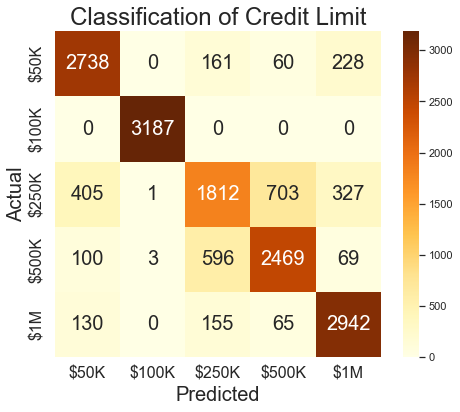

In [124]:
fig, ax = plt.subplots(figsize=(8,6))

sns.heatmap(dfConfM2, xticklabels=['$50K','$100K','$250K','$500K','$1M'], yticklabels=['$50K','$100K','$250K','$500K','$1M'], 
            annot=True, fmt='1g', annot_kws={'fontsize': 20}, square=True, cmap='YlOrBr')

ax.set_xlabel('Predicted', fontsize=20)
ax.set_ylabel('Actual', fontsize=20)
ax.set_title('Classification of Credit Limit', fontsize=24)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

plt.show()